In [1]:
!pip install matplotlib matplotlib-venn pandas



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install pandas matplotlib matplotlib-venn



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [4]:
df = pd.read_csv("../data/insomnia_cohort.csv")
print("Cohort loaded:", df.shape)
print(df.head())

print("Number of insomnia_flag")
print(df['insomnia_flag'].value_counts(dropna=False))

print("\nAverage age by insomnia status:")
print(df.groupby('insomnia_flag')['anchor_age'].mean())

print("\nGender breakdown:")
print(df.groupby(['insomnia_flag', 'gender']).size().unstack(fill_value=0))


Cohort loaded: (364627, 7)
   subject_id gender  anchor_age  rulea  ruleb  rulec  insomnia_flag
0    10000032      F          52    0.0    1.0    1.0            1.0
1    10000048      F          23    NaN    NaN    NaN            NaN
2    10000058      F          33    NaN    NaN    NaN            NaN
3    10000068      F          19    NaN    NaN    NaN            NaN
4    10000084      M          72    0.0    0.0    1.0            1.0
Number of insomnia_flag
insomnia_flag
NaN    306065
1.0     58562
Name: count, dtype: int64

Average age by insomnia status:
insomnia_flag
1.0    61.388597
Name: anchor_age, dtype: float64

Gender breakdown:
gender             F      M
insomnia_flag              
1.0            28983  29579


We now draw some plots to visualize cohort distribution.

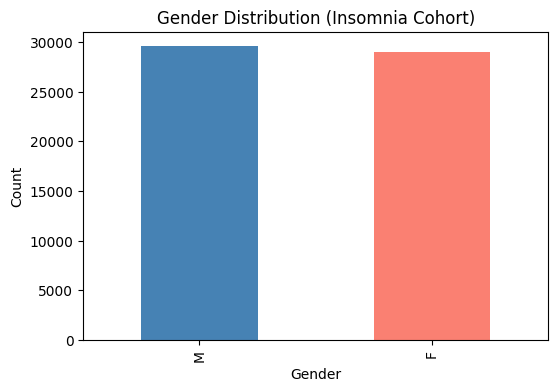

In [5]:
import matplotlib.pyplot as plt

# Filter only patients flagged with insomnia
insomnia_df = df[df['insomnia_flag'] == 1.0]

plt.figure(figsize=(6,4))
insomnia_df['gender'].value_counts().plot(kind='bar', color=['steelblue', 'salmon'])
plt.title("Gender Distribution (Insomnia Cohort)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


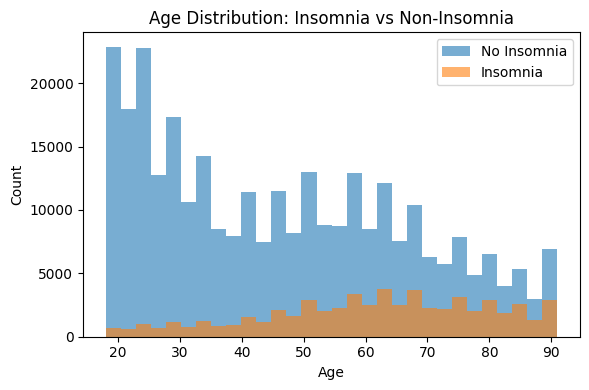

In [9]:

# 1) Ensure numeric flag
df['insomnia_flag'] = pd.to_numeric(df['insomnia_flag'], errors='coerce')

# 2) Masks
ins_mask  = df['insomnia_flag'] == 1.0
non_mask  = df['insomnia_flag'].isna()   # non-insomnia are NaN

# 3) Age arrays (drop NaNs)
ins_ages  = df.loc[ins_mask, 'anchor_age'].dropna()
non_ages  = df.loc[non_mask, 'anchor_age'].dropna()

# 4) Plot
plt.figure(figsize=(6,4))
plt.hist(non_ages,  bins=30, alpha=0.6, label='No Insomnia')
plt.hist(ins_ages,  bins=30, alpha=0.6, label='Insomnia')
plt.title("Age Distribution: Insomnia vs Non-Insomnia")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

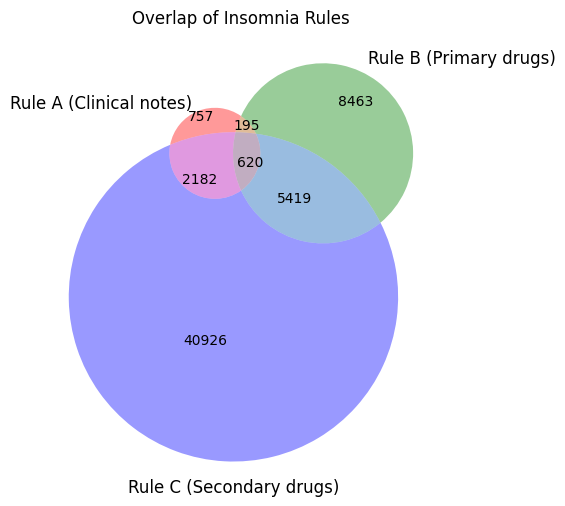

In [10]:
# Rule overlap visualization (A, B, C)
ruleA = set(df[df['rulea'] == 1]['subject_id'])
ruleB = set(df[df['ruleb'] == 1]['subject_id'])
ruleC = set(df[df['rulec'] == 1]['subject_id'])

plt.figure(figsize=(6,6))
venn3(
    subsets=(ruleA, ruleB, ruleC),
    set_labels=('Rule A (Clinical notes)', 'Rule B (Primary drugs)', 'Rule C (Secondary drugs)')
)
plt.title("Overlap of Insomnia Rules")
plt.show()